# EV Charge point locations
## IBM Data Science Capstone
<I>Hans-Martin Duringhof</I>

This notebook is going to be used for the capstone project for IBM's Applied Data Science Capstone Project course on Coursera

---
## Introduction
With the upcoming rise of EV (Electric Vehicle) adoption, a EV charging service provider in Sweden want to understund the current placement of EV charging locations in the country, and compare them to Norway and The Netherlands, two countries where EV adoption has been faster than virtually any other country. Based on the distribution of charge points in Norway and The Netherlands, particularly around their respective capitals, compared to the current situation in Sweden; a recommendation is sought on where to start installing new charge points.

### Data needed
At the heart of the solution will be the foursquare location category "EV Charging Station", together with distances to other venues that could be of intererst to EV owners charging their car (restaurants, shopping, playgrounds etc...). This data will be analysed for at least the capitals Stockholm, Oslo and Amsterdam.

---
### Installing necessary packages and importing libraries

In [1]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib as mpl
import matplotlib.pyplot as plt

from pandas.io.json import json_normalize # tranforming json file into a pandas dataframe library

# use the inline backend to generate the plots within the browser
%matplotlib inline 

print('Libraries imported.')

Libraries imported.


---
### Settting important values for Foursquare

In [3]:
{
    "tags": [
        "hide_input",
    ]
}

CLIENT_ID = '2PCUJNP030YAWD2YPLPALVHKK5V1BVM3CR0JWEZGCS5GJIIR' # your Foursquare ID
CLIENT_SECRET = '2WBQIVX5G4JDDNKULMFLVY31A0D5MQ3MBJYNK2EZ52TBJJE3' # your Foursquare Secret
VERSION = '20180604'

In [4]:
Hotel_cid = '4bf58dd8d48988d1fa931735'
EVCS_cid = '5032872391d4c4b30a586d64'

In [5]:
radius = 100000 # meters
limit = 1000

In [6]:
latitude_NL = 52.3667 # Amsterdam
longitude_NL = 4.8945
latitude_NO = 59.9139 # Oslo
longitude_NO = 10.7522
latitude_SE = 59.3293 # Stockholm
longitude_SE = 18.0686

---
### Search for EV Charging Stations

In [7]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_SE, longitude_SE, VERSION, EVCS_cid, radius, limit)
results_EVCS_SE = requests.get(url).json()
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_NL, longitude_NL, VERSION, EVCS_cid, radius, limit)
results_EVCS_NL = requests.get(url).json()
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_NO, longitude_NO, VERSION, EVCS_cid, radius, limit)
results_EVCS_NO = requests.get(url).json()

In [8]:
# assign relevant part of JSON to venues
venues_EVCS_NL = results_EVCS_NL['response']['venues']
venues_EVCS_NO = results_EVCS_NO['response']['venues']
venues_EVCS_SE = results_EVCS_SE['response']['venues']

# transform venues into a dataframe
dataframe_EVCS_NL = json_normalize(venues_EVCS_NL)
dataframe_EVCS_NO = json_normalize(venues_EVCS_NO)
dataframe_EVCS_SE = json_normalize(venues_EVCS_SE)
dataframe_EVCS_NL = dataframe_EVCS_NL[['location.cc','location.distance','location.lat','location.lng','name']]
dataframe_EVCS_NO = dataframe_EVCS_NO[['location.cc','location.distance','location.lat','location.lng','name']]
dataframe_EVCS_SE = dataframe_EVCS_SE[['location.cc','location.distance','location.lat','location.lng','name']]

---
### Acquiring main statistics

In [9]:
dataframe_EVCS_NL.describe()

,location.distance,location.lat,location.lng
count,50.000000,50.000000,50.000000
mean,60941.440000,52.148998,5.161304
std,32945.187971,0.457447,0.540228
min,2541.000000,51.267977,4.278167
25%,34153.500000,51.806746,4.733104
50%,64117.000000,52.161698,5.058910
75%,83197.250000,52.418113,5.522063
max,126908.000000,53.105865,6.157099


In [10]:
dataframe_EVCS_NO.describe()

,location.distance,location.lat,location.lng
count,34.000000,34.000000,34.000000
mean,45037.058824,59.805550,10.548391
std,33838.225535,0.405428,0.540568
min,835.000000,59.111902,9.248610
25%,8954.250000,59.521726,10.229974
50%,43017.500000,59.803539,10.731309
75%,71812.250000,59.912928,10.786969
max,106074.000000,60.795540,11.826097


In [11]:
dataframe_EVCS_SE.describe()

,location.distance,location.lat,location.lng
count,12.000000,12.000000,12.000000
mean,56298.000000,59.347165,17.306093
std,31344.345606,0.341379,0.543989
min,1716.000000,58.746488,16.505120
25%,29582.250000,59.153662,16.926748
50%,63894.500000,59.355563,17.484807
75%,87567.500000,59.613740,17.645958
max,92920.000000,59.939114,18.087241


The statistics above confirm that there is a huge difference in the number of charging stations, Stockholm having only 12 within a radius of 100 km, where Oslo and Amsterdam have 34 and 50 respectively.

While average distance to the city centre is fairly similar, the other statistics are hinting that they are distributed quite differently, which can be analysed further by plotting histograms.

---
### Histogram plots

(array([1., 4., 0., 3., 4.]),
 array([ 1716. , 19956.8, 38197.6, 56438.4, 74679.2, 92920. ]),
 <a list of 5 Patch objects>)

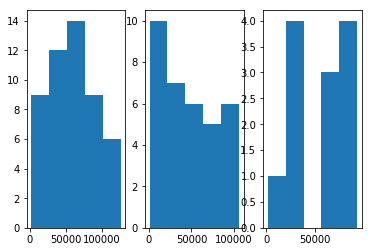

In [23]:
fig, axs = plt.subplots(1, 3)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(dataframe_EVCS_NL['location.distance'], bins=5)
axs[1].hist(dataframe_EVCS_NO['location.distance'], bins=5)
axs[2].hist(dataframe_EVCS_SE['location.distance'], bins=5)

The histograms indeed show a rather different distribution, Amsterdam having the majority of charging stations at about 50km from the city centre, whereas Stockholm has none in that area. Oslo has the most charging stations in the city centre, also in contrast with (almost) none in the Stockholm city centre. Hence this provides already two clear suggestions on where to start expanding the charging infrastructure in the Stockholm region.

---
### Showing locations on a map

In [20]:
map_NL = folium.Map(width=500,height=500,location=[latitude_NL, longitude_NL], zoom_start=7)

# add markers to map
for lat, lng, name in zip(dataframe_EVCS_NL['location.lat'], dataframe_EVCS_NL['location.lng'], dataframe_EVCS_NL['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NL)  
    
map_NL

In [21]:
map_NO = folium.Map(width=500,height=500,location=[latitude_NO, longitude_NO], zoom_start=7)

# add markers to map
for lat, lng, name in zip(dataframe_EVCS_NO['location.lat'], dataframe_EVCS_NO['location.lng'], dataframe_EVCS_NO['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NO)  
    
map_NO

In [30]:
map_SE = folium.Map(width=500,height=500,location=[latitude_SE, longitude_SE], zoom_start=7)

# add markers to map
for lat, lng, name in zip(dataframe_EVCS_SE['location.lat'], dataframe_EVCS_SE['location.lng'], dataframe_EVCS_SE['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SE)  

folium.Circle([latitude_SE, longitude_SE],
                    radius=50000,
                    color='red'
                   ).add_to(map_SE)

map_SE

The latter figure shows a red circle representing a 50km radius, hence it is recommended to deploy charging stations on the circle primarily, besides deploying charge stations right in the city centre.